#neuritesQuantified

##total_length

In [1]:
import pandas as pd

In [9]:
import sys
sys.path.append('Users/drdiek/Dropbox/Python/dir_neuritesQuantified/lib')

In [10]:
print "Initializing variables ..."

nCells = [0, 0, 0, 0, 0, 0]
nLayers = [4, 5, 4, 4, 3, 6]

try:
    overlapBinaryDF = pd.read_csv('data/overlap_matrix.csv')
except IOError:
    print "The file {} does not exist.".format('data/overlap_matrix.csv')
try:
    neuritesQuantifiedDF = pd.read_excel('data/neurites_quantified_v1.0.xlsx')
except IOError:
    print "The file {} does not exist.".format('neurites_quantified_v1.0.xlsx')

nCells[0] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 2000])
nCells[1] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 3000]) - sum(nCells[0:1])
nCells[2] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 4000]) - sum(nCells[0:2])
nCells[3] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 5000]) - sum(nCells[0:3])
nCells[4] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] < 6000]) - sum(nCells[0:4])
nCells[5] = len(overlapBinaryDF.loc[overlapBinaryDF['UniqueIDs'] > 5999])

Initializing variables ...


In [11]:
quantityDF = neuritesQuantifiedDF['Total_length (micron)']
selections = [{'string'     : 'Total neurite length ($\mu$m)', \
               'plotString' : 'Total_Neurite_Length', \
               'selection'  : 1}]            
quantitySelectionsDF = pd.DataFrame(selections)

In [12]:
subregionDF = pd.DataFrame([{'selection' : 0}])
selections = [{'label' : 'DG', \
               'code'  : 1, \
               'start' : 0, \
               'end'   : sum(nCells[0:1])}]            
subregionDF = pd.DataFrame(selections)

In [13]:
print "Averaging quantity values ..."

neuritesDF = neuritesQuantifiedDF['Unique_ID'].apply(str) + ':' + neuritesQuantifiedDF['Neurite']

uniqueNeurites = neuritesDF.unique()
meansDF = pd.DataFrame([{'Factors'   : 0, \
                         'Means'     : 0, \
                         'Neurites'  : 0, \
                         'UniqueIDs' : 0}])

for i in range(len(uniqueNeurites)):
    idx = neuritesDF.index[neuritesDF == uniqueNeurites[i]]
    meansDF.loc[i, 'Factors'] = len(idx)
    meansDF.loc[i, 'UniqueIDs'] = neuritesQuantifiedDF['Unique_ID'].iloc[idx[0]]
    meansDF.loc[i, 'Neurites'] = neuritesQuantifiedDF['Neurite'].iloc[idx[0]]
    lst = list(quantityDF.iloc[idx])
    meansDF.loc[i, 'Means'] = sum(lst)/float(len(lst))

Averaging quantity values ...


In [19]:
import matplotlib
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from lib.diek_functions import time_stamp

from lib.plot_functions import HCcolors as c
from lib.plot_functions import make_color_map

In [21]:
def parcel_lookup(parcel):
    parcels = ('DG:SMo', \
               'DG:SMi', \
               'DG:SG', \
               'DG:H', \
               'CA3:SLM', \
               'CA3:SR', \
               'CA3:SL', \
               'CA3:SP', \
               'CA3:SO', \
               'CA2:SLM', \
               'CA2:SR', \
               'CA2:SP', \
               'CA2:SO', \
               'CA1:SLM', \
               'CA1:SR', \
               'CA1:SP', \
               'CA1:SO', \
               'Sub:SM', \
               'Sub:SP', \
               'Sub:PL', \
               'EC:I', \
               'EC:II', \
               'EC:III', \
               'EC:IV', \
               'EC:V', \
               'EC:VI')
    for i in range(len(parcels)):
        if parcels[i] == parcel:
            parcelNo = i
    return(parcelNo)

Making overlap binary color map ...
Plotting overlap binary background data ...
Plotting mean quantity values ...


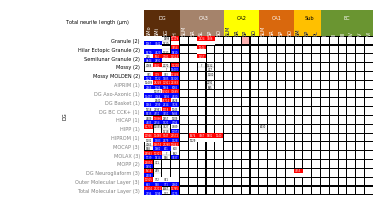

Saving data to pdf file output/Total_Neurite_Length_matrix_201811261450.pdf ...



In [22]:
nNeurons = len(overlapBinaryDF)
nRows, nColumns = overlapBinaryDF.shape
nParcels = nColumns - 4 # account for header columns (UniqueIDs, Names, Abbreviations, EorI)

overlapBinaryLayers = overlapBinaryParcels = list(overlapBinaryDF)[4:]
for j in range(nParcels):
    idx = [pos for pos, char in enumerate(overlapBinaryParcels[j]) if char == ':']
    overlapBinaryLayers[j] = overlapBinaryParcels[j][idx[0]+1:]

regionColors = [c.BROWN_DG,
                c.BROWN_CA3,
                c.YELLOW_CA2,
                c.ORANGE_CA1,
                c.YELLOW_Sub,
                c.GREEN_EC]
DG = 0
CA3 = 1
CA2 = 2
CA1 = 3
Sub = 4
EC = 5

START = subregionDF.loc[0, 'start']
END = subregionDF.loc[0, 'end']

nNeuronsDisplayed = END - START

overlapBinaryColors = [c.WHITE,        # 0
                       c.RED_LIGHT,    # 1
                       c.BLUE_LIGHT,   # 2
                       c.PURPLE_LIGHT] # 3

nOverlapBinaryColors = len(overlapBinaryColors)

print "Making overlap binary color map ..."
overlapBinaryColorMap = make_color_map(overlapBinaryColors)

print "Plotting overlap binary background data ..."
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_aspect("equal")

ax.axis('off')

overlapBinaryDataDF = overlapBinaryDF.iloc[:,4:]
CijOverlap = overlapBinaryDataDF.iloc[START:(END+1), :]
plt.pcolormesh(CijOverlap, cmap=overlapBinaryColorMap, edgecolors=c.BLACK, linewidth=0.1)

vStart = -3

plt.xlim(-12, nParcels)
plt.ylim(vStart, nNeuronsDisplayed)

plt.gca().invert_yaxis()

# color-coded tags for the subregions
ax.add_patch(patches.Rectangle((sum(nLayers[:DG]), vStart), nLayers[DG], 3, edgecolor="none",
                               facecolor=c.BROWN_DG))
ax.add_patch(patches.Rectangle((sum(nLayers[:CA3]), vStart), nLayers[CA3], 3, edgecolor="none",
                               facecolor=c.BROWN_CA3))
ax.add_patch(patches.Rectangle((sum(nLayers[:CA2]), vStart), nLayers[CA2], 3, edgecolor="none",
                               facecolor=c.YELLOW_CA2))
ax.add_patch(patches.Rectangle((sum(nLayers[:CA1]), vStart), nLayers[CA1], 3, edgecolor="none",
                               facecolor=c.ORANGE_CA1))
ax.add_patch(patches.Rectangle((sum(nLayers[:Sub]), vStart), nLayers[Sub], 3, edgecolor="none",
                               facecolor=c.YELLOW_Sub))
ax.add_patch(patches.Rectangle((sum(nLayers[:EC]), vStart), nLayers[EC], 3, edgecolor="none",
                               facecolor=c.GREEN_EC))

hTab = -9

# add title label to plot
if (subregionDF.loc[0, 'label'] == 'All'):
    displayFontSize = 1
else:
    displayFontSize = 5
ax.text(hTab, -1.5, quantitySelectionsDF.loc[0, 'string'], rotation=0, horizontalalignment="left",
        fontsize=displayFontSize, color=c.BLACK)

# parcellation subregion headers
tab = [sum(nLayers[:DG]) + (nLayers[DG]+1)/2,
       sum(nLayers[:CA3]) + (nLayers[CA3]+0.5)/2,
       sum(nLayers[:CA2]) + (nLayers[CA2]+1)/2,
       sum(nLayers[:CA1]) + (nLayers[CA1]+1)/2,
       sum(nLayers[:Sub]) + (nLayers[Sub]+0.5)/2,
       sum(nLayers[:EC]) + (nLayers[EC]+1)/2
      ]

## parcellation subregion abbreviations
ax.text(tab[DG], -2, "DG", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)
ax.text(tab[CA3], -2, "CA3", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)
ax.text(tab[CA2], -2, "CA2", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.BLACK)
ax.text(tab[CA1], -2, "CA1", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)
ax.text(tab[Sub], -2, "Sub", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.BLACK)
ax.text(tab[EC], -2, "EC", rotation=0, horizontalalignment="center", fontsize=displayFontSize, color=c.WHITE)

## parcellation layer abbreviations
for j in range(sum(nLayers)):
    ax.text(j+0.5, -0.1, overlapBinaryLayers[j], rotation=90, horizontalalignment="center", 
            verticalalignment="bottom", fontsize=displayFontSize, color=c.WHITE)
for j in range(sum(nLayers[:CA2]), sum(nLayers[:CA1])):
    ax.text(j+0.5, -0.1, overlapBinaryLayers[j], rotation=90, horizontalalignment="center", 
            verticalalignment="bottom", fontsize=displayFontSize, color=c.BLACK)
for j in range(sum(nLayers[:Sub]), sum(nLayers[:EC])):
    ax.text(j+0.5, -0.1, overlapBinaryLayers[j], rotation=90, horizontalalignment="center", 
            verticalalignment="bottom", fontsize=displayFontSize, color=c.BLACK)

# cell type subregion headers
strng = 'DG'
vCorrection = 0.0
if ((subregionDF.loc[0, 'label'] == 'DG') or (subregionDF.loc[0, 'label'] == 'All')):
    DGstart = nCells[DG]/2
    ax.text(hTab, DGstart+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
strng = 'CA3'
vCorrection = 0.0
if (subregionDF.loc[0, 'label'] == 'CA3'):
    CA3start = nCells[CA3]/2
    ax.text(hTab, CA3start+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
elif (subregionDF.loc[0, 'label'] == 'All'):
    CA3start = sum(nCells[:CA3]) + nCells[CA3]/2
    ax.text(hTab, CA3start+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
strng = 'CA2'
vCorrection = 0.0
if (subregionDF.loc[0, 'label'] == 'CA2'):
    CA2start = nCells[CA2]/2
    ax.text(hTab, CA2start+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
elif (subregionDF.loc[0, 'label'] == 'All'):
    CA2start = sum(nCells[:CA2]) + nCells[CA2]/2
    ax.text(hTab, CA2start+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
strng = 'CA1'
vCorrection = 0.0
if (subregionDF.loc[0, 'label'] == 'CA1'):
    CA1start = nCells[CA1]/2
    ax.text(hTab, CA1start+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
elif (subregionDF.loc[0, 'label'] == 'All'):
    CA1start = sum(nCells[:CA1]) + nCells[CA1]/2
    ax.text(hTab, CA1start+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
strng = 'Sub'
vCorrection = 0.0
if (subregionDF.loc[0, 'label'] == 'Sub'):
    Substart = nCells[Sub]/2
    ax.text(hTab, Substart+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
elif (subregionDF.loc[0, 'label'] == 'All'):
    Substart = sum(nCells[:Sub]) + nCells[Sub]/2
    ax.text(hTab, Substart+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
strng = 'EC'
vCorrection = 0.0
if (subregionDF.loc[0, 'label'] == 'EC'):
    ECstart = nCells[EC]/2
    ax.text(hTab, ECstart+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)
elif (subregionDF.loc[0, 'label'] == 'All'):
    ECstart = sum(nCells[:EC]) + nCells[EC]/2
    ax.text(hTab, ECstart+vCorrection, strng, horizontalalignment="center", rotation=90,
            fontsize=displayFontSize, color=c.BLACK)

# thick horizontal lines on cell type axis
if (subregionDF.loc[0, 'label'] == 'All'):
    lineWidth = 0.2
    CA3line = sum(nCells[:CA3])
    CA2line = sum(nCells[:CA2])
    CA1line = sum(nCells[:CA1])
    Subline = sum(nCells[:Sub])
    ECline = sum(nCells[:EC])

    ax.plot([hTab, nParcels], [CA3line, CA3line], linewidth=lineWidth, color=c.BLACK)
    ax.plot([hTab, nParcels], [CA2line, CA2line], linewidth=lineWidth, color=c.BLACK)
    ax.plot([hTab, nParcels], [CA1line, CA1line], linewidth=lineWidth, color=c.BLACK)
    ax.plot([hTab, nParcels], [Subline, Subline], linewidth=lineWidth, color=c.BLACK)
    ax.plot([hTab, nParcels], [ECline, ECline], linewidth=lineWidth, color=c.BLACK)

# plot labels
for i in range(START, END):
    hTab = -0.5
    labelCode = "{0:s} ({1:d})".format(overlapBinaryDF.loc[i, 'Names'], int(meansDF.loc[i, 'Factors']))
    labelColor = c.BLACK
    if overlapBinaryDF.loc[i, 'EorI'] == 'I':
        labelColor = c.GRAY
    ax.text(hTab, i-START+0.5, labelCode, rotation=0, horizontalalignment="right", verticalalignment="center",
            fontsize=displayFontSize, color=labelColor)

nMeanValues = len(meansDF)

print "Plotting mean quantity values ..."

for i in range(nMeanValues):
    vTab = int(overlapBinaryDF['UniqueIDs'].index[overlapBinaryDF['UniqueIDs'] ==
                                                  meansDF.loc[i, 'UniqueIDs']].tolist() - START)
    neuriteStr = meansDF.loc[i, 'Neurites'] # e.g. DG:SMo
    # locate position of the colon in the Neurites string
    idx = [pos for pos, char in enumerate(neuriteStr) if char == ':']
    # the parcel abbreviation (subregion:layer) preceeds the second colon: e.g. DG:SMo
    parcel = neuriteStr[:idx[1]]
    # set the horizontal tab according to the parcel
    hTab = parcel_lookup(parcel)
    # the neurite abbreviation (A or D) follows the second colon
    neurite = neuriteStr[idx[1]+1:]

    if (np.isnan(meansDF.loc[i, 'Means'])):
        strng = '?'
    else:
        value = meansDF.loc[i, 'Means']
        if (quantitySelectionsDF.loc[0, 'selection'] == 1): # total neurite length
            strng = "{0:.0f}".format(value)
        elif (quantitySelectionsDF.loc[0, 'selection'] == 2): # percent of neurite tree
            strng = "{0:.2f}".format(value)
        elif (quantitySelectionsDF.loc[0, 'selection'] == 3): # density
            strng = "{0:.4f}".format(value)
        elif (quantitySelectionsDF.loc[0, 'selection'] == 4): # average maximum path length
            strng = "{0:.0f}".format(value)
        else: # (quantitySelectionsDF.loc[0, 'selection'] == 2): # average mean path length
            strng = "{0:.0f}".format(value)

    if (((meansDF.loc[i, 'UniqueIDs'] // 1000) == subregionDF.loc[0, 'code']) or
        (subregionDF.loc[0, 'code'] == 0)):
        if (neurite == 'A'):
            if (overlapBinaryDataDF.iloc[vTab+START, hTab] == 1): # axons only
                ax.add_patch(patches.Rectangle((hTab+0.02, vTab+0.02), 0.96, 0.48, edgecolor="none",
                               facecolor=c.RED))
                ax.add_patch(patches.Rectangle((hTab+0.02, vTab+0.5), 0.96, 0.48, edgecolor="none",
                               facecolor=c.WHITE))
                if ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] >= 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.WHITE)
                elif ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] < 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.YELLOW)
                else:
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.WHITE)
            elif (overlapBinaryDataDF.iloc[vTab+START, hTab] == 3): # axons from axons and dendrites
                ax.add_patch(patches.Rectangle((hTab+0.02, vTab+0.02), 0.96, 0.48, edgecolor="none",
                               facecolor=c.RED))
                if ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] >= 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.WHITE)
                elif ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] < 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.YELLOW)
                else:
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.WHITE)
            elif (overlapBinaryDataDF.iloc[vTab+START, hTab] == 2): # dendrites only
                ax.add_patch(patches.Rectangle((hTab+0.02, vTab+0.02), 0.96, 0.48, edgecolor="none",
                               facecolor=c.WHITE))
                if ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] >= 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.BLACK)
                elif ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] < 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.GREEN)
                else:
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.BLACK)
            else: # (overlapBinaryDataDF.iloc[vTab+START, hTab] == 0): # no axons or dendrites
                if ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] >= 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.RED)
                elif ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] < 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.GREEN)
                else:
                    ax.text(hTab+0.5, vTab+0.25, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.BLACK)
                ax.plot([hTab, hTab+1], [vTab+0.5, vTab+0.5], linewidth=0.1, color=c.BLACK) # diving line
        if (neurite == 'D'):
            if (overlapBinaryDataDF.iloc[vTab+START, hTab] == 2): # dendrites only
                ax.add_patch(patches.Rectangle((hTab+0.02, vTab+0.5), 0.96, 0.48, edgecolor="none",
                               facecolor=c.BLUE))
                ax.add_patch(patches.Rectangle((hTab+0.02, vTab+0.02), 0.96, 0.48, edgecolor="none",
                               facecolor=c.WHITE))
                if ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] >= 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.WHITE)
                elif ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] < 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.YELLOW)
                else:
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.WHITE)
            elif (overlapBinaryDataDF.iloc[vTab+START, hTab] == 3): # dendrites from axons and dendrites
                ax.add_patch(patches.Rectangle((hTab+0.02, vTab+0.5), 0.96, 0.48, edgecolor="none",
                               facecolor=c.BLUE))
                if ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] >= 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.WHITE)
                elif ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] < 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.YELLOW)
                else:
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.WHITE)
            elif (overlapBinaryDataDF.iloc[vTab+START, hTab] == 1): # axons only
                ax.add_patch(patches.Rectangle((hTab+0.02, vTab+0.5), 0.96, 0.48, edgecolor="none",
                               facecolor=c.WHITE))
                if ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] >= 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.BLACK)
                elif ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] < 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.GREEN)
                else:
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.BLACK)
            else: # (overlapBinaryDataDF.iloc[vTab+START, hTab] == 0): # no axons or dendrites
                if ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] >= 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.BLUE)
                elif ((quantitySelectionsDF.loc[0, 'selection'] == 2) and meansDF.loc[i, 'Means'] < 15): # % of neurite tree
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.GREEN)
                else:
                    ax.text(hTab+0.5, vTab+0.75, strng, horizontalalignment="center", rotation=0,
                            verticalalignment="center", fontsize=displayFontSize/2.0, color=c.BLACK)
                ax.plot([hTab, hTab+1], [vTab+0.5, vTab+0.5], linewidth=0.1, color=c.BLACK) # diving line
plt.show()

# save plot
outputFileName = "output/{0:s}_matrix_{1:s}.pdf".format(quantitySelectionsDF.loc[0, 'plotString'], time_stamp())
print "Saving data to pdf file %s ...\n" % outputFileName    
fig.savefig(outputFileName, dpi=600)